In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('TaxiData.csv')

# print(df['payment_type'].isna().sum())
df['trip_seconds'] = df['trip_seconds'].fillna(0)

# df.sort_values(by='fare').tail()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
6707,76.0,98.85,10,17,7,1445102100,41.979071,-87.903040,41.884987,-87.620993,17.0,NaN,1.703132e+10,Cash,NaN,2520.0,32.0,0.0
9198,32.0,100.25,5,16,2,1431360000,41.884987,-87.620993,NaN,NaN,52.6,NaN,NaN,Cash,NaN,6420.0,NaN,0.0
4060,28.0,112.65,1,20,7,1420920900,41.874005,-87.663518,41.878915,-87.705897,57.0,NaN,NaN,Cash,NaN,5520.0,27.0,0.0
9191,22.0,175.05,12,7,4,1419407100,41.928619,-87.685362,41.979071,-87.903040,71.7,NaN,1.703198e+10,Cash,NaN,24720.0,76.0,0.0
11570,6.0,700.07,5,8,6,1463731200,41.936310,-87.651563,41.922083,-87.634156,0.0,NaN,1.703107e+10,Cash,NaN,600.0,7.0,0.0


### 3.a Fare and Tip Distribution

#### Fare

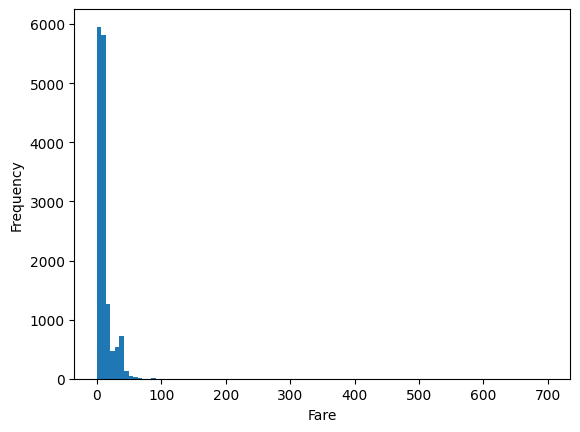

In [ ]:
df_fare = df['fare']
plt.hist(df_fare, 100)
plt.xlabel('Fare')
plt.ylabel('Frequency')
# plt.savefig('3a_1.png')
plt.show()
plt.close()

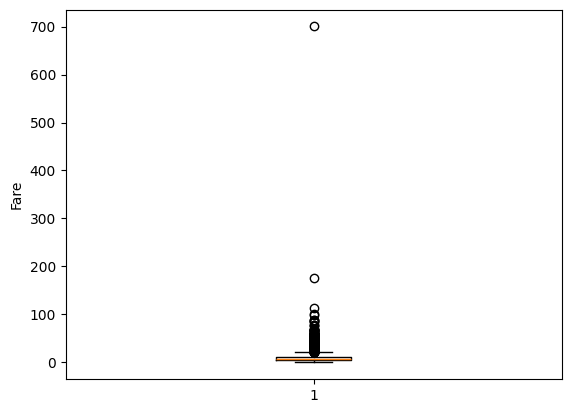

In [ ]:
plt.boxplot(df_fare)
plt.ylabel('Fare')
# plt.savefig('3a_2.png')
plt.show()
plt.close()

The range of fare is from 0 to around 700. There are a few outliers in the data, with large fares such as 700, 172 and 115. Most of the data is clustered in the range 0-50. 

In [38]:
print("Mean: ", df_fare.mean())
print("Median: ", df_fare.median())
print("Standard Deviation: ", df_fare.std())

Mean:  11.768216237834956
Median:  7.85
Standard Deviation:  11.538850470754118


#### Tips

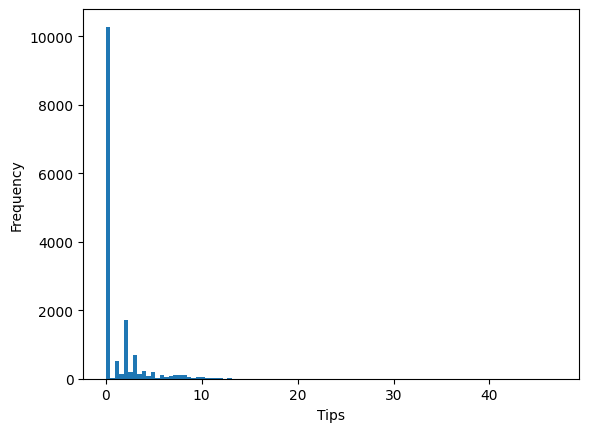

In [ ]:
df_tips = df['tips']
plt.hist(df_tips, 100)
plt.xlabel('Tips')
plt.ylabel('Frequency')
# plt.savefig('3a_3.png')
plt.show()
plt.close()

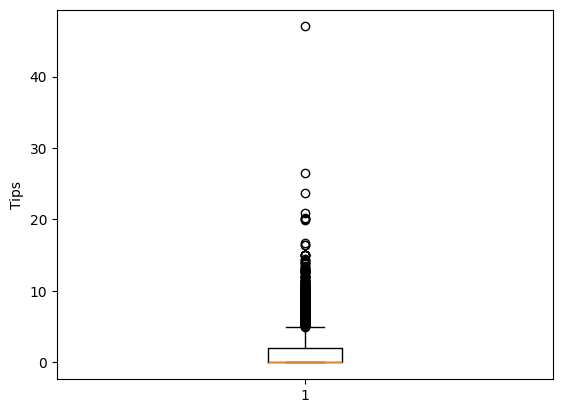

In [ ]:
plt.boxplot(df_tips)
plt.ylabel('Tips')
# plt.savefig('3a_4.png')
plt.show()
plt.close()

The tips are in the range 0 to 47, with some outliers with large tips such as 47, 26 and 23. There are clusters around 0 and 4. There is a small cluster around 7.

In [41]:
print("Mean: ", df_tips.mean())
print("Median: ", df_tips.median())
print("Standard Deviation: ", df_tips.std())

Mean:  1.0766744434075455
Median:  0.0
Standard Deviation:  2.1583404234827888


### 3.b Payment Method Insights

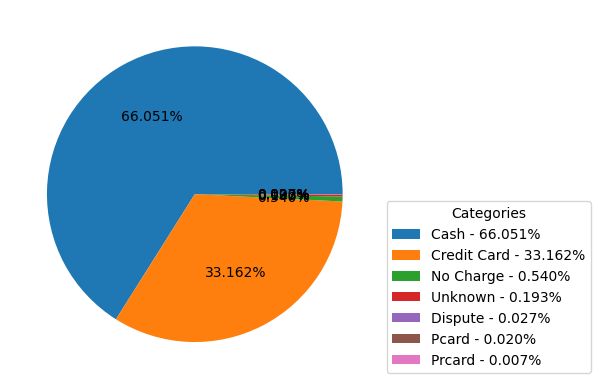

In [ ]:
sizes = df['payment_type'].value_counts()
labels=df['payment_type'].value_counts().index

wedges, texts, autotexts = plt.pie(sizes, labels=[None]*len(labels), autopct='%1.3f%%')

legend_labels = [f"{label} - {autotext.get_text()}" for label, autotext in zip(labels, autotexts)]
plt.legend(legend_labels, title="Categories", bbox_to_anchor=(1, 0.5))
# plt.savefig('3b_1.png', bbox_inches='tight')
plt.show()
plt.close()

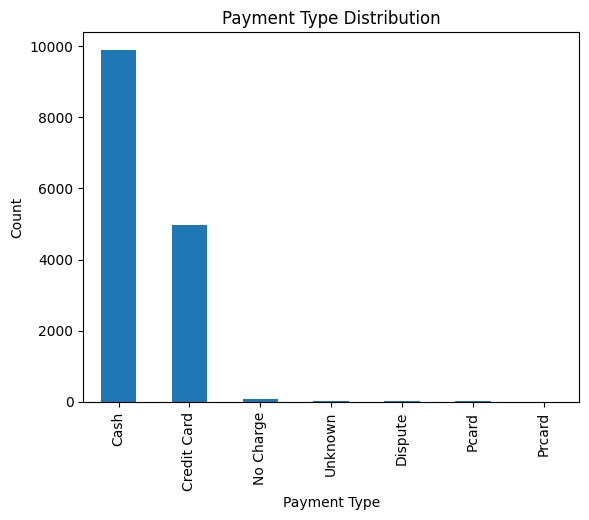

In [ ]:
df['payment_type'].value_counts().plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment Type Distribution')
# plt.savefig('3b_2.png', bbox_inches='tight')
plt.show()
plt.close()

The dominant payment methods are Cash and Credit Card, with Cash being the most preferred method. There is only a small minority which does not use either of them. Hence, the service providers should definitely facilitate both these methods. No Charge also has a significant ratio (0.5%) and should be facilitated.

### 3.c Tips by Payment Method

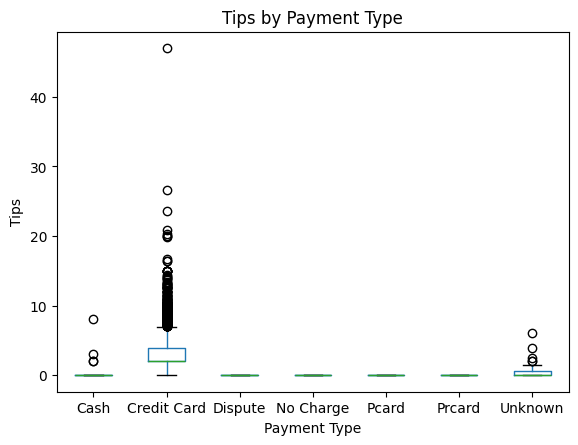

In [ ]:
df.boxplot(column='tips', by='payment_type', grid=False)
plt.title('Tips by Payment Type')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Payment Type')
plt.ylabel('Tips')
# plt.savefig('3c_1.png', bbox_inches='tight')
plt.show()
plt.close()

In [51]:
average_tips = df.groupby('payment_type')['tips'].mean()
print(average_tips)

payment_type
Cash           0.001519
Credit Card    3.239668
Dispute        0.000000
No Charge      0.000000
Pcard          0.000000
Prcard         0.000000
Unknown        0.685172
Name: tips, dtype: float64


From the box-plots, credit card users tend to give larger tips than any other type of user. Also, all the customers who give large tips are credit card users. Customers who use cash tend to give very small tips, though the number of such users is large.

### 3.d Fare vs. Distance

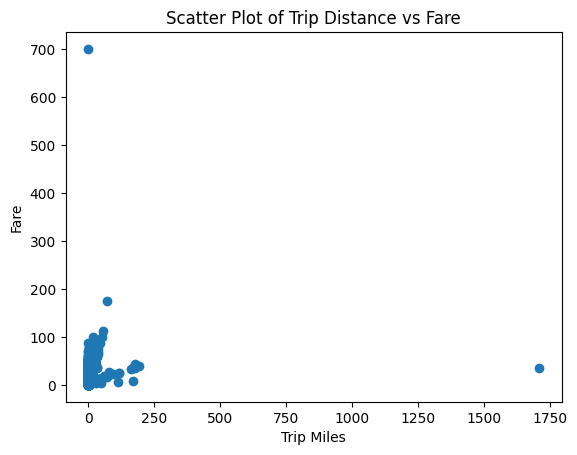

Correlation coefficient between trip miles and fare:  0.22380232969278901


In [ ]:
plt.scatter(df['trip_miles'], df['fare'])
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
plt.title('Scatter Plot of Trip Distance vs Fare')
# plt.savefig('3d_1.png', bbox_inches='tight')
plt.show()
plt.close()

correlation = df['trip_miles'].corr(df['fare'])
print("Correlation coefficient between trip miles and fare: ", correlation)

From the scatter-plot, there are a few distinct portions starting from origin which seem to have a correlation. We can infer that there are some different pricing rates for the trips. Further, longer trips seem to have lower fares than shorter ones.